In [1]:
"""
A simple example of the Stiefel landing algorithm on PCA problem
"""
from time import time

import matplotlib.pyplot as plt

import numpy as np
from solvers import GeneralizedLanding
import cupy as cp
from scipy.linalg import eigh

In [2]:
n = 1000
p = 20

In [3]:
Q1,_ = np.linalg.qr(np.random.randn(n,n))
Q2,_ = np.linalg.qr(np.random.randn(n,n))
s1 = np.linspace(start=1, stop = 1/n, num = n)
s2 = np.linspace(start=1, stop = 1/n, num = n)
A = (Q1 * s1) @ Q1.T
B = (Q2 * s2) @ Q2.T
#A = A / np.linalg.norm(A)
#B = B / np.linalg.norm(B)

In [4]:
uB, sB, vB = np.linalg.svd(B)
B_sqrt_inv = np.dot(uB * sB**(-0.5), uB.T)
M = B_sqrt_inv @ A @ B_sqrt_inv
uG, sG, vhG = np.linalg.svd(M)

In [5]:
x_true = B_sqrt_inv  @ uG[:,:p]

In [6]:
np.trace(x_true.T @ A @ x_true)

1824.883507748079

In [7]:
np.linalg.norm(x_true.T @ B @ x_true - np.eye(p), 'fro')

6.971830085134284e-14

In [8]:
eigvals, eigvecs = eigh(A, B, eigvals_only=False, subset_by_index=[n-2*p, n-1])

In [9]:
eigvecs.shape

(1000, 40)

In [10]:
np.linalg.norm(eigvecs[:,:p].T @ B @ eigvecs[:,:p] - np.eye(p), 'fro')

7.973191751172965e-15

In [11]:
np.trace(x_true.T @ A @ x_true)

1824.883507748079

In [12]:
np.trace(eigvecs.T @ A @ eigvecs)

2176.9154939618047

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


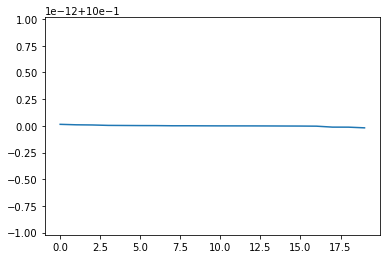

In [13]:
_, s_dist, _ = np.linalg.svd(x_true.T @B@ eigvecs[:,-p:])
print(s_dist)
plt.plot(s_dist)

In [14]:
solver = GeneralizedLanding(maxiter = 4000)
x0 = Q2[:,:p]
x, optlog = solver.solve(A, B, p, 1, 1, 0.5, x0=x0)

-14.24830614312546
0.049699094559156165
-19.58649011663549
0.21885985889897713
-28.352873063813547
0.05479432719480674
-39.99937130127687
0.21981809328527555
-55.4250481808607
0.16490530908887502
-73.16154378610915
0.20915425402927837
-91.53651298085805
0.2044508664965975
-109.51561115867064
0.18681163670127748
-126.93759253663234
0.16202410157518346
-143.96172035211478
0.13852918414115828
-160.7380156087768
0.11923581100305121
-177.3478458911486
0.10406479175553678
-193.82311511296678
0.0921486112940754
-210.17041217369166
0.08263892196591058
-226.38657136743197
0.07489476949676403
-242.46742313202046
0.06846495493112983
-258.4120576171193
0.0630351135707795
-274.224027974584
0.058384331693751755
-289.91078970845865
0.054354571817162634
-305.48249883942333
0.05082977074034618
-320.9508503561941
0.04772204048826153
-336.32819182204037
0.044962930055537594
-351.62688165641816
0.04249802027826877
-366.8587817521315
0.04028352397734964
-382.0348024962089
0.0382840006808061
-397.1644790197

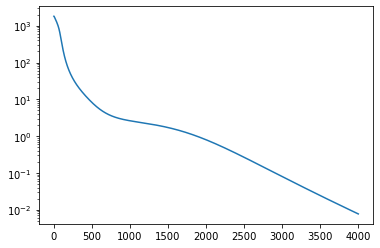

In [17]:
plt.semilogy(np.trace(x_true.T @ A @ x_true) + np.array(optlog['iterations']['fx']))
plt.show()
plt.semilogy(optlog['iterations']['gradnorm'])
plt.show()
plt.semilogy(optlog['iterations']['distance'])
plt.show()

In [24]:
Bx = B@x
xtBx = x.T@Bx
grad = -A@x
rel_grad = grad@(Bx.T@ Bx) - Bx@(grad.T @ Bx)
normal_direction = Bx@(xtBx - np.eye(p))
landing_direction = rel_grad + 1 * normal_direction



In [21]:
np.linalg.norm(rel_grad,'fro')

0.08351437692937383

In [22]:
np.linalg.norm(normal_direction,'fro')

0.02549170993071184

In [20]:
np.trace(normal_direction.T@rel_grad)

-1.8177327048077285e-18

In [17]:
np.linalg.norm(rel_grad,'fro')

0.0009411469974263811

In [18]:
np.linalg.norm(Bx.T@x - np.eye(p),'fro')

3.8736286092430003e-07

[1.00000009 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 0.99987038 0.95772783]


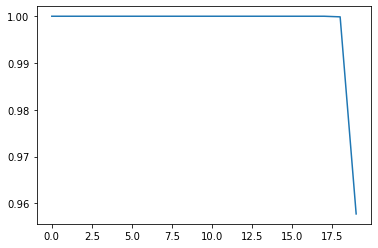

In [21]:
_, s_dist, _ = np.linalg.svd(x_true.T @B@ cp.asnumpy(x))
print(s_dist)
plt.plot(s_dist)

In [45]:
Bx = B@x
grad = -A@x
rel_grad = grad@(Bx.T@ Bx) - Bx@(grad.T @ Bx)

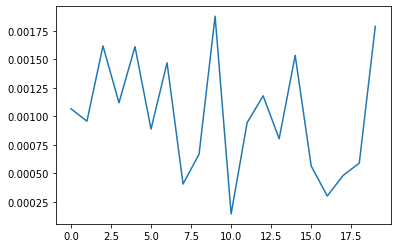

In [46]:
plt.plot(np.linalg.norm(rel_grad, axis = 0))

In [53]:
eigvals[p+1] - eigvals[p]

0.8714446208953959

In [32]:
B@x @ (x.T@B@x-np.eye(p))

array([[ 2.11388117e-08,  5.62158691e-08, -7.78938919e-08, ...,
         2.20061096e-07,  3.50985848e-07, -2.42929821e-07],
       [-4.84000133e-08, -1.74709516e-07,  6.76702261e-08, ...,
        -6.32241647e-07, -9.75046602e-08,  1.53047507e-07],
       [ 6.48428321e-07,  4.94509806e-07, -1.74013067e-07, ...,
         3.61238410e-07, -2.89517324e-07, -1.80160832e-07],
       ...,
       [-4.54503122e-07, -5.72365020e-07,  3.08299481e-08, ...,
        -1.33094021e-06, -1.67012858e-08,  1.84383763e-07],
       [ 3.18292594e-08, -3.27352732e-07, -1.06944043e-07, ...,
        -8.49196693e-07, -1.60643097e-07,  2.12091856e-08],
       [-6.56793925e-08, -1.65691900e-07,  1.05180959e-07, ...,
         1.59344099e-07,  2.64845165e-07,  9.70515044e-08]])

In [29]:
eigvals

array([ 25.48050366,  26.35194828,  28.12034402,  30.01376447,
        31.3255748 ,  35.00176122,  36.70672503,  38.16666289,
        41.69941254,  45.30054971,  52.08286952,  55.33960199,
        62.75198968,  72.59880648,  84.16764082,  99.35436891,
       132.27936876, 172.61028228, 257.71751558, 476.30734557])

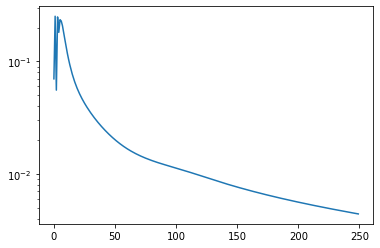

In [24]:
plt.semilogy(optlog['iterations']['distance'])

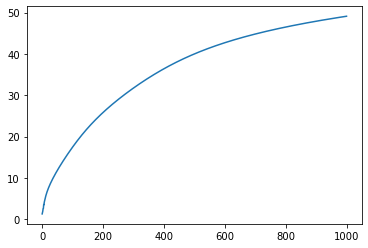

In [20]:
plt.plot(optlog['iterations']['gradnorm'])

In [14]:
np.trace(x_true).item()

-2.3844033687938464

In [15]:
x.T @ B @ x

array([[ 1.00086590e+00,  1.31238331e-05,  6.94913287e-05, ...,
        -1.19343693e-04, -1.89682327e-04, -1.58990216e-04],
       [ 1.31238331e-05,  1.00084025e+00, -1.25364565e-04, ...,
        -1.57699673e-04,  5.91658826e-05,  3.11380342e-04],
       [ 6.94913287e-05, -1.25364565e-04,  1.00092079e+00, ...,
        -4.15300636e-05, -7.17551079e-05, -9.08014822e-05],
       ...,
       [-1.19343693e-04, -1.57699673e-04, -4.15300636e-05, ...,
         1.00052736e+00, -9.45591990e-05, -2.39738364e-04],
       [-1.89682327e-04,  5.91658826e-05, -7.17551079e-05, ...,
        -9.45591990e-05,  1.00064888e+00,  3.76977382e-04],
       [-1.58990216e-04,  3.11380342e-04, -9.08014822e-05, ...,
        -2.39738364e-04,  3.76977382e-04,  1.00113526e+00]])

In [16]:
x_true.T @ x

array([[-4.67627127e+01,  7.98312761e+01,  5.17810424e+01, ...,
        -7.11014658e+01,  1.00080334e+02,  1.86731181e+02],
       [ 1.25023393e+01, -3.85245917e+00, -1.42425113e+01, ...,
        -2.42075804e+01, -3.23314197e+01,  1.12324834e+01],
       [ 8.65730924e+00,  1.62621211e+01, -7.16700813e+00, ...,
         7.36657045e+00, -1.55324505e+01, -7.41311953e+00],
       ...,
       [-2.09253119e-01, -3.74590720e-01,  1.97479104e-01, ...,
         2.46551374e-01,  2.09442650e-01, -1.10079185e-01],
       [-1.07404992e-01, -3.19254317e-01,  1.94228002e-01, ...,
         1.68749859e-01,  2.81009890e-02, -1.79964983e-01],
       [-2.25968196e-01, -3.23456764e-01, -3.57745488e-01, ...,
        -1.43035405e-01, -7.58094489e-01, -1.35040239e-01]])

In [17]:
_, s_dist, _ = np.linalg.svd(x_true.T @B@ cp.asnumpy(x))
s_dist

In [18]:
s_dist

array([1.00925337, 1.00640773, 1.00588115, 1.00501625, 1.00462065,
       1.00423089, 1.00364651, 1.00352689, 1.00313673, 1.00291757,
       1.00230094, 1.00220182, 1.00206627, 1.00191786, 1.00171362,
       1.00165521, 1.00148391, 1.00131216, 1.00119279, 1.00107472,
       1.00104211, 1.00087645, 1.00080842, 1.00078395, 1.00070319,
       1.00053786, 1.00052707, 1.00048158, 1.0004151 , 1.0004021 ,
       1.00034277, 1.00030287, 1.00027852, 1.00024372, 1.00023352,
       1.00021416, 1.00021061, 1.00017287, 1.00015888, 1.00014739,
       1.00012927, 1.0001234 , 1.00010358, 1.00009986, 1.00008928,
       1.00007595, 1.00007269, 1.00006771, 1.00006328, 1.000055  ,
       1.00005125, 1.00004644, 1.00004441, 1.00003514, 1.00003279,
       1.0000307 , 1.00002722, 1.00002239, 1.00002154, 1.00002088,
       1.00001781, 1.00001415, 1.00001376, 1.00001223, 1.00001032,
       1.00000838, 1.00000796, 1.00000722, 1.0000056 , 1.00000538,
       1.00000502, 1.00000459, 1.00000382, 1.00000324, 1.00000

In [53]:
np.trace(cp.asnumpy(x).T @ A @ cp.asnumpy(x))

8488.207642404303

In [54]:
np.trace(x_true.T @ A @ x_true)

29567.349263606764